In [25]:
#ignorando los warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Importando las librerías

In [26]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier

## 2. Leyendo los datos

In [27]:
dataset = pd.read_csv('..\datos_procesados\datos_procesados.csv')
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69971,19240,2,168,76.0,120,80,1,1,1,0,1,0
69972,22601,1,158,126.0,140,90,2,2,0,0,1,1
69973,19066,2,183,105.0,180,90,3,1,0,1,0,1
69974,22431,1,163,72.0,135,80,1,2,0,0,0,1


## 3. Separando los datos en las variables predictoras (**X**) y la variable a predecir (y)

In [28]:
X = dataset.drop(columns=['cardio'], axis=1)
y = dataset['cardio']

## 4. Separando los datos en train y test

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5. Creando el pipeline

In [30]:
#Creando los pasos del pipeline
pasos = [
    #('esc_rob', RobustScaler()),
    #('pca', PCA()),
    ('bagging', BaggingClassifier(
        estimator=RandomForestClassifier(),
        n_estimators=10,
    ))
]

#Se crea el pipeline
pipeline = Pipeline(steps=pasos)

#Entrenando el pipeline con los datos de entrenamiento
pipeline.fit(X=X_train, y=y_train)

Pipeline(steps=[('bagging',
                 BaggingClassifier(estimator=RandomForestClassifier()))])

#### 5.1 Evaluando las predicciones del modelo con los datos de entrenamiento

Presición del modelo con los datos entrenamiento: 94.44 %


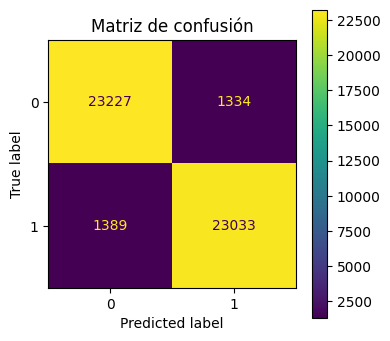

In [31]:
y_pred = pipeline.predict(X=X_train)
print('Presición del modelo con los datos entrenamiento: {:.2f} %'.format(accuracy_score(y_true=y_train, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_train, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()

#### 5.2 Evaluando las predicciones del modelo con los datos de test

Presición del modelo con los datos de prueba: 72.32 %


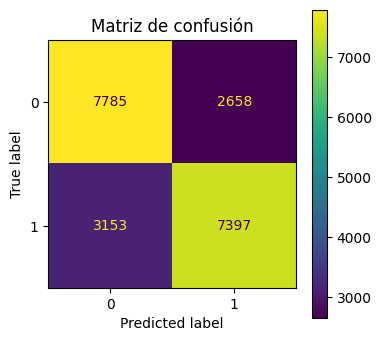

In [32]:
y_pred = pipeline.predict(X=X_test)
print('Presición del modelo con los datos de prueba: {:.2f} %'.format(accuracy_score(y_true=y_test, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()